In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

df = []

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        d = pd.read_csv(os.path.join(dirname, filename))
        df.append(d)

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# This lines suppress FutureWarning messages specifically for the "seaborn" module.
# It ensures that any future compatibility warnings raised by seaborn are ignored,
# allowing the script to run without displaying these warnings in the console.
import warnings

warnings.filterwarnings("ignore", category=FutureWarning, module="seaborn")

In [6]:
# This line sets a Pandas option to ensure explicit behavior when downcasting data types.
pd.set_option('future.no_silent_downcasting', True)

# Data Description

In [8]:
# This line concatenates a list or collection of DataFrames (df) along the rows (axis=0).
frame = pd.concat(df, axis=0, ignore_index=True)

In [9]:
frame.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,22,1266342,41,44,2664,6954,456,0,64.975610,109.864573,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,22,1319353,41,44,2664,6954,456,0,64.975610,109.864573,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,22,160,1,1,0,0,0,0,0.000000,0.000000,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,22,1303488,41,42,2728,6634,456,0,66.536585,110.129945,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,35396,77,1,2,0,0,0,0,0.000000,0.000000,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [10]:
frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2830743 entries, 0 to 2830742
Data columns (total 79 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0    Destination Port             int64  
 1    Flow Duration                int64  
 2    Total Fwd Packets            int64  
 3    Total Backward Packets       int64  
 4   Total Length of Fwd Packets   int64  
 5    Total Length of Bwd Packets  int64  
 6    Fwd Packet Length Max        int64  
 7    Fwd Packet Length Min        int64  
 8    Fwd Packet Length Mean       float64
 9    Fwd Packet Length Std        float64
 10  Bwd Packet Length Max         int64  
 11   Bwd Packet Length Min        int64  
 12   Bwd Packet Length Mean       float64
 13   Bwd Packet Length Std        float64
 14  Flow Bytes/s                  float64
 15   Flow Packets/s               float64
 16   Flow IAT Mean                float64
 17   Flow IAT Std                 float64
 18   Flow IAT Max         

Fwd PSH Flags 

In [11]:
frame.iloc[:,:15].describe()

/opt/conda/lib/python3.10/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s
count,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.829385e+06
mean,8.071483e+03,1.478566e+07,9.361160e+00,1.039377e+01,5.493024e+02,1.616264e+04,2.075999e+02,1.871366e+01,5.820194e+01,6.891013e+01,8.708495e+02,4.104958e+01,3.059493e+02,3.353257e+02,inf
std,1.828363e+04,3.365374e+07,7.496728e+02,9.973883e+02,9.993589e+03,2.263088e+06,7.171848e+02,6.033935e+01,1.860912e+02,2.811871e+02,1.946367e+03,6.886260e+01,6.052568e+02,8.396932e+02,NaN
min,0.000000e+00,-1.300000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-2.610000e+08
25%,5.300000e+01,1.550000e+02,2.000000e+00,1.000000e+00,1.200000e+01,0.000000e+00,6.000000e+00,0.000000e+00,6.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.193197e+02
50%,8.000000e+01,3.131600e+04,2.000000e+00,2.000000e+00,6.200000e+01,1.230000e+02,3.700000e+01,2.000000e+00,3.400000e+01,0.000000e+00,7.900000e+01,0.000000e+00,7.200000e+01,0.000000e+00,4.595549e+03
75%,4.430000e+02,3.204828e+06,5.000000e+00,4.000000e+00,1.870000e+02,4.820000e+02,8.100000e+01,3.600000e+01,5.000000e+01,2.616295e+01,2.800000e+02,7.700000e+01,1.810000e+02,7.794054e+01,1.666667e+05
max,6.553500e+04,1.200000e+08,2.197590e+05,2.919220e+05,1.290000e+07,6.554530e+08,2.482000e+04,2.325000e+03,5.940857e+03,7.125597e+03,1.953000e+04,2.896000e+03,5.800500e+03,8.194660e+03,inf


In [13]:
frame.iloc[:,25:50].describe()

,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,...,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count
count,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2830743.0,2.830743e+06,2830743.0,2.830743e+06,...,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06
mean,9.893830e+06,1.805784e+06,1.485973e+06,4.684692e+06,9.672614e+05,4.644646e-02,0.0,1.112782e-04,0.0,-2.599739e+04,...,1.719444e+02,2.949756e+02,4.861548e+05,3.537976e-02,4.644646e-02,2.423392e-04,2.980705e-01,3.158443e-01,9.482316e-02,1.112782e-04
std,2.873661e+07,8.887197e+06,6.278469e+06,1.716095e+07,8.308983e+06,2.104500e-01,0.0,1.054826e-02,0.0,2.105286e+07,...,3.054915e+02,6.318001e+02,1.647490e+06,1.847378e-01,2.104500e-01,1.556536e-02,4.574107e-01,4.648513e-01,2.929706e-01,1.054826e-02
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.0,-3.221223e+10,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.0,4.000000e+01,...,6.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,3.000000e+00,3.000000e+00,0.000000e+00,3.000000e+00,1.000000e+00,0.000000e+00,0.0,0.000000e+00,0.0,6.400000e+01,...,5.720000e+01,2.598076e+01,6.750000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,9.858050e+04,1.824857e+04,1.572409e+04,6.021000e+04,4.500000e+01,0.000000e+00,0.0,0.000000e+00,0.0,1.200000e+02,...,1.198000e+02,1.743239e+02,3.038884e+04,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
max,1.200000e+08,1.200000e+08,8.441801e+07,1.200000e+08,1.200000e+08,1.000000e+00,0.0,1.000000e+00,0.0,4.644908e+06,...,3.337143e+03,4.731522e+03,2.240000e+07,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


In [14]:
frame.iloc[:,50:].describe()

,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
count,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2830743.0,2830743.0,2830743.0,2830743.0,...,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06
mean,2.433990e-04,6.835004e-01,1.919837e+02,5.820194e+01,3.059493e+02,-2.599739e+04,0.0,0.0,0.0,0.0,...,5.418218e+00,-2.741688e+03,8.155132e+04,4.113412e+04,1.531825e+05,5.829582e+04,8.316037e+06,5.038439e+05,8.695752e+06,7.920031e+06
std,1.559935e-02,6.804920e-01,3.318603e+02,1.860912e+02,6.052568e+02,2.105286e+07,0.0,0.0,0.0,0.0,...,6.364257e+02,1.084989e+06,6.485999e+05,3.933815e+05,1.025825e+06,5.770923e+05,2.363008e+07,4.602984e+06,2.436689e+07,2.336342e+07
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-3.221223e+10,0.0,0.0,0.0,0.0,...,0.000000e+00,-5.368707e+08,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,7.500000e+00,6.000000e+00,0.000000e+00,4.000000e+01,0.0,0.0,0.0,0.0,...,0.000000e+00,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.000000e+00,1.000000e+00,7.225000e+01,3.400000e+01,7.200000e+01,6.400000e+01,0.0,0.0,0.0,0.0,...,1.000000e+00,2.400000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,0.000000e+00,1.000000e+00,1.492639e+02,5.000000e+01,1.810000e+02,1.200000e+02,0.0,0.0,0.0,0.0,...,2.000000e+00,3.200000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,1.000000e+00,1.560000e+02,3.893333e+03,5.940857e+03,5.800500e+03,4.644908e+06,0.0,0.0,0.0,0.0,...,2.135570e+05,1.380000e+02,1.100000e+08,7.420000e+07,1.100000e+08,1.100000e+08,1.200000e+08,7.690000e+07,1.200000e+08,1.200000e+08


In [15]:
#This one to look up the names of columsns
cols = frame.columns
cols

Index([' Destination Port', ' Flow Duration', ' Total Fwd Packets',
       ' Total Backward Packets', 'Total Length of Fwd Packets',
       ' Total Length of Bwd Packets', ' Fwd Packet Length Max',
       ' Fwd Packet Length Min', ' Fwd Packet Length Mean',
       ' Fwd Packet Length Std', 'Bwd Packet Length Max',
       ' Bwd Packet Length Min', ' Bwd Packet Length Mean',
       ' Bwd Packet Length Std', 'Flow Bytes/s', ' Flow Packets/s',
       ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min',
       'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max',
       ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std',
       ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags', ' Bwd PSH Flags',
       ' Fwd URG Flags', ' Bwd URG Flags', ' Fwd Header Length',
       ' Bwd Header Length', 'Fwd Packets/s', ' Bwd Packets/s',
       ' Min Packet Length', ' Max Packet Length', ' Packet Length Mean',
       ' Packet Length Std', ' Packet Length Variance', '

## Conclusion

# Data Processing
## Converting a multi-class target to a binary target

In [16]:
#This one checks the names of target labels
vals_attac = frame[' Label'].value_counts()
vals_attac

 Label
BENIGN                        2273097
DoS Hulk                       231073
PortScan                       158930
DDoS                           128027
DoS GoldenEye                   10293
FTP-Patator                      7938
SSH-Patator                      5897
DoS slowloris                    5796
DoS Slowhttptest                 5499
Bot                              1966
Web Attack � Brute Force         1507
Web Attack � XSS                  652
Infiltration                       36
Web Attack � Sql Injection         21
Heartbleed                         11
Name: count, dtype: int64

There're 

In [17]:
dictToRename = {}
for labs in vals_attac.index:
    if labs=='BENIGN':
        dictToRename[labs] = 0
    else:
        dictToRename[labs] = 1
dictToRename

{'BENIGN': 0,
 'DoS Hulk': 1,
 'PortScan': 1,
 'DDoS': 1,
 'DoS GoldenEye': 1,
 'FTP-Patator': 1,
 'SSH-Patator': 1,
 'DoS slowloris': 1,
 'DoS Slowhttptest': 1,
 'Bot': 1,
 'Web Attack � Brute Force': 1,
 'Web Attack � XSS': 1,
 'Infiltration': 1,
 'Web Attack � Sql Injection': 1,
 'Heartbleed': 1}

In [19]:
frame['Bin_Label'] = frame[' Label'].replace(dictToRename)

In [20]:
frame['Bin_Label'].value_counts()

Bin_Label
0    2273097
1     557646
Name: count, dtype: int64

In [21]:
frame.drop(' Label', axis=1, inplace=True)

## Checking for infinite values (inf)

In [22]:
numerics = ['int64','float64']
newdf = frame.select_dtypes(include=numerics)
newdf.columns.to_series()[np.isinf(newdf).any()]

#frame.columns.to_series()[np.isinf(frame).any()]

Flow Bytes/s          Flow Bytes/s
 Flow Packets/s     Flow Packets/s
dtype: object

In [24]:
frame[frame[' Flow Packets/s']==np.inf]['Bin_Label'].value_counts()

Bin_Label
0    1777
1    1090
Name: count, dtype: int64

In [25]:
frame[frame['Flow Bytes/s']==np.inf]['Bin_Label'].value_counts()

Bin_Label
0    1368
1     141
Name: count, dtype: int64

In [26]:
valToReplace = 100 * frame[frame[' Flow Packets/s']!=np.inf][' Flow Packets/s'].max()
frame[' Flow Packets/s'] = frame[' Flow Packets/s'].replace(np.inf, valToReplace)

In [27]:
frame = frame.drop(frame[frame['Flow Bytes/s'] == np.inf].index)

## Checking for missing values

In [29]:
null_lst = frame.isnull().any()
print(null_lst[null_lst==True])

Flow Bytes/s    True
dtype: bool


## Filling missing values

In [31]:
#from sklearn.impute import KNNImputer

#imputer = KNNImputer(n_neighbors=2)
#frame = imputer.fit_transform(frame)

In [32]:
fill_mean = frame['Flow Bytes/s'].mean()
frame['Flow Bytes/s'] = frame['Flow Bytes/s'].fillna(fill_mean)

In [33]:
cols_new = frame.columns
cols_new

Index([' Destination Port', ' Flow Duration', ' Total Fwd Packets',
       ' Total Backward Packets', 'Total Length of Fwd Packets',
       ' Total Length of Bwd Packets', ' Fwd Packet Length Max',
       ' Fwd Packet Length Min', ' Fwd Packet Length Mean',
       ' Fwd Packet Length Std', 'Bwd Packet Length Max',
       ' Bwd Packet Length Min', ' Bwd Packet Length Mean',
       ' Bwd Packet Length Std', 'Flow Bytes/s', ' Flow Packets/s',
       ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min',
       'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max',
       ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std',
       ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags', ' Bwd PSH Flags',
       ' Fwd URG Flags', ' Bwd URG Flags', ' Fwd Header Length',
       ' Bwd Header Length', 'Fwd Packets/s', ' Bwd Packets/s',
       ' Min Packet Length', ' Max Packet Length', ' Packet Length Mean',
       ' Packet Length Std', ' Packet Length Variance', '

In [34]:
float_lst = []
for cols_n in cols_new:
    if frame[cols_n].dtype == 'float64':
        float_lst.append(cols_n)
float_lst

[' Fwd Packet Length Mean',
 ' Fwd Packet Length Std',
 ' Bwd Packet Length Mean',
 ' Bwd Packet Length Std',
 'Flow Bytes/s',
 ' Flow Packets/s',
 ' Flow IAT Mean',
 ' Flow IAT Std',
 ' Fwd IAT Mean',
 ' Fwd IAT Std',
 ' Bwd IAT Mean',
 ' Bwd IAT Std',
 'Fwd Packets/s',
 ' Bwd Packets/s',
 ' Packet Length Mean',
 ' Packet Length Std',
 ' Packet Length Variance',
 ' Average Packet Size',
 ' Avg Fwd Segment Size',
 ' Avg Bwd Segment Size',
 'Active Mean',
 ' Active Std',
 'Idle Mean',
 ' Idle Std']

In [35]:
int_lst = []
for cols_n in cols_new:
    if frame[cols_n].dtype == 'int64':
        int_lst.append(cols_n)
int_lst

[' Destination Port',
 ' Flow Duration',
 ' Total Fwd Packets',
 ' Total Backward Packets',
 'Total Length of Fwd Packets',
 ' Total Length of Bwd Packets',
 ' Fwd Packet Length Max',
 ' Fwd Packet Length Min',
 'Bwd Packet Length Max',
 ' Bwd Packet Length Min',
 ' Flow IAT Max',
 ' Flow IAT Min',
 'Fwd IAT Total',
 ' Fwd IAT Max',
 ' Fwd IAT Min',
 'Bwd IAT Total',
 ' Bwd IAT Max',
 ' Bwd IAT Min',
 'Fwd PSH Flags',
 ' Bwd PSH Flags',
 ' Fwd URG Flags',
 ' Bwd URG Flags',
 ' Fwd Header Length',
 ' Bwd Header Length',
 ' Min Packet Length',
 ' Max Packet Length',
 'FIN Flag Count',
 ' SYN Flag Count',
 ' RST Flag Count',
 ' PSH Flag Count',
 ' ACK Flag Count',
 ' URG Flag Count',
 ' CWE Flag Count',
 ' ECE Flag Count',
 ' Down/Up Ratio',
 ' Fwd Header Length.1',
 'Fwd Avg Bytes/Bulk',
 ' Fwd Avg Packets/Bulk',
 ' Fwd Avg Bulk Rate',
 ' Bwd Avg Bytes/Bulk',
 ' Bwd Avg Packets/Bulk',
 'Bwd Avg Bulk Rate',
 'Subflow Fwd Packets',
 ' Subflow Fwd Bytes',
 ' Subflow Bwd Packets',
 ' Subflow

## Processing binary columns

In [36]:
single_vals = [col for col in frame.columns 
               if len(frame[col].unique())==1]
single_vals

[' Bwd PSH Flags',
 ' Bwd URG Flags',
 'Fwd Avg Bytes/Bulk',
 ' Fwd Avg Packets/Bulk',
 ' Fwd Avg Bulk Rate',
 ' Bwd Avg Bytes/Bulk',
 ' Bwd Avg Packets/Bulk',
 'Bwd Avg Bulk Rate']

In [40]:
frame = frame.drop(single_vals, axis=1)

In [41]:
bool_cols = [col for col in frame 
             if np.isin(frame[col].unique(), [0, 1]).all()]
bool_cols

['Fwd PSH Flags',
 ' Fwd URG Flags',
 'FIN Flag Count',
 ' SYN Flag Count',
 ' RST Flag Count',
 ' PSH Flag Count',
 ' ACK Flag Count',
 ' URG Flag Count',
 ' CWE Flag Count',
 ' ECE Flag Count',
 'Bin_Label']

In [43]:
cols_to_drop = []
for col in bool_cols:
    c = frame[col].value_counts()
    if c[1]/c[0] < .1:
        cols_to_drop.append(col)
print(cols_to_drop)

['Fwd PSH Flags', ' Fwd URG Flags', 'FIN Flag Count', ' SYN Flag Count', ' RST Flag Count', ' CWE Flag Count', ' ECE Flag Count']


In [44]:
frame = frame.drop(cols_to_drop, axis=1)

# Working with a sample 1000

In [45]:
sns.set_style('darkgrid')
sns.set_palette('bright')

In [49]:
#sample 1000 
frame_sample = frame.groupby('Bin_Label').sample(n=500, random_state=1)

In [50]:
frame_sample[frame_sample['Bin_Label']== 1]

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Bin_Label
2440207,80,4,2,0,0,0,0,0,0.000000,0.000000,...,32,0.0,0.0,0,0,0.0,0.0,0,0,1
2329438,80,98599743,6,6,373,11595,373,0,62.166667,152.276612,...,32,48.0,0.0,48,48,98500000.0,0.0,98500000,98500000,1
177497,60020,76,1,1,0,6,0,0,0.000000,0.000000,...,40,0.0,0.0,0,0,0.0,0.0,0,0,1
161183,5718,33,1,1,0,6,0,0,0.000000,0.000000,...,40,0.0,0.0,0,0,0.0,0.0,0,0,1
122247,2382,65,1,1,2,6,2,2,2.000000,0.000000,...,24,0.0,0.0,0,0,0.0,0.0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138120,2200,43,1,1,2,6,2,2,2.000000,0.000000,...,24,0.0,0.0,0,0,0.0,0.0,0,0,1
2390176,80,4,2,0,0,0,0,0,0.000000,0.000000,...,32,0.0,0.0,0,0,0.0,0.0,0,0,1
994855,80,222466,3,5,26,11607,20,0,8.666667,10.263203,...,20,0.0,0.0,0,0,0.0,0.0,0,0,1
97182,808,15,1,1,2,6,2,2,2.000000,0.000000,...,24,0.0,0.0,0,0,0.0,0.0,0,0,1


In [51]:
def Calc_Mean_Var_of_Floats(df: pd.DataFrame, label_bin: str, names: list) -> list:
    for i in names:
        mean_true = df[df[label_bin]== 1][i].mean()
        mean_false = df[df[label_bin]== 0][i].mean()
        var_true = df[df[label_bin]== 1][i].var()
        var_false = df[df[label_bin]== 0][i].var()
        print(f"For{i} \n If attack is True: Mean  : {mean_true:.4f}, \n Variance  : {var_true:.4f}")
        print(f"If attack is False: Mean  : {mean_false:.4f},\n Variance : {var_false:.4f}", '\n')

Calc_Mean_Var_of_Floats(frame_sample, 'Bin_Label', float_lst[:5])

For Fwd Packet Length Mean 
 If attack is True: Mean  : 22.9034, 
 Variance  : 1285.8553
If attack is False: Mean  : 66.6519,
 Variance : 35815.1707 

For Fwd Packet Length Std 
 If attack is True: Mean  : 44.2328, 
 Variance  : 4425.3891
If attack is False: Mean  : 77.8573,
 Variance : 84146.1066 

For Bwd Packet Length Mean 
 If attack is True: Mean  : 930.1309, 
 Variance  : 1118594.4580
If attack is False: Mean  : 170.2609,
 Variance : 88263.8630 

For Bwd Packet Length Std 
 If attack is True: Mean  : 1269.0231, 
 Variance  : 2513380.6357
If attack is False: Mean  : 133.9510,
 Variance : 82506.1320 

ForFlow Bytes/s 
 If attack is True: Mean  : 122615.0104, 
 Variance  : 333609458298.7302
If attack is False: Mean  : 3188328.3747,
 Variance : 2188388763983280.0000 



In [52]:
int_lst = []
for cols_n in frame.columns:
    if frame[cols_n].dtype == 'int64':
        int_lst.append(cols_n)
int_lst

[' Destination Port',
 ' Flow Duration',
 ' Total Fwd Packets',
 ' Total Backward Packets',
 'Total Length of Fwd Packets',
 ' Total Length of Bwd Packets',
 ' Fwd Packet Length Max',
 ' Fwd Packet Length Min',
 'Bwd Packet Length Max',
 ' Bwd Packet Length Min',
 ' Flow IAT Max',
 ' Flow IAT Min',
 'Fwd IAT Total',
 ' Fwd IAT Max',
 ' Fwd IAT Min',
 'Bwd IAT Total',
 ' Bwd IAT Max',
 ' Bwd IAT Min',
 ' Fwd Header Length',
 ' Bwd Header Length',
 ' Min Packet Length',
 ' Max Packet Length',
 ' PSH Flag Count',
 ' ACK Flag Count',
 ' URG Flag Count',
 ' Down/Up Ratio',
 ' Fwd Header Length.1',
 'Subflow Fwd Packets',
 ' Subflow Fwd Bytes',
 ' Subflow Bwd Packets',
 ' Subflow Bwd Bytes',
 'Init_Win_bytes_forward',
 ' Init_Win_bytes_backward',
 ' act_data_pkt_fwd',
 ' min_seg_size_forward',
 ' Active Max',
 ' Active Min',
 ' Idle Max',
 ' Idle Min']

In [53]:
def Calc_Max_Min_Mean_of_Ints(df: pd.DataFrame, label_bin: str, names: list) -> None:
    for i in names:
        mean_true = df[df[label_bin]== 1][i].mean()
        mean_false = df[df[label_bin]== 0][i].mean()
        max_true = df[df[label_bin]== 1][i].max()
        max_false = df[df[label_bin]== 0][i].max()
        min_true = df[df[label_bin]== 1][i].min()
        min_false = df[df[label_bin]== 0][i].min()
        print(f"If attack is True: \n Mean of {i} : {mean_true:.3f}, \n Minimum of {i:} : {min_true}, \
            \n Maximum of {i} : {max_true}\n")
        print(f"If attack is False: \n Mean of {i} : {mean_false:.3f},\n Minimum of {i} : {min_false},\
            \n Maximum of {i} : {max_false}\n")

Calc_Max_Min_Mean_of_Ints(frame_sample, 'Bin_Label', int_lst[:5])

If attack is True: 
 Mean of  Destination Port : 2796.040, 
 Minimum of  Destination Port : 21,             
 Maximum of  Destination Port : 65000

If attack is False: 
 Mean of  Destination Port : 8892.068,
 Minimum of  Destination Port : 22,            
 Maximum of  Destination Port : 65502

If attack is True: 
 Mean of  Flow Duration : 28922605.530, 
 Minimum of  Flow Duration : 0,             
 Maximum of  Flow Duration : 116622342

If attack is False: 
 Mean of  Flow Duration : 11401218.952,
 Minimum of  Flow Duration : 1,            
 Maximum of  Flow Duration : 118919981

If attack is True: 
 Mean of  Total Fwd Packets : 3.884, 
 Minimum of  Total Fwd Packets : 1,             
 Maximum of  Total Fwd Packets : 19

If attack is False: 
 Mean of  Total Fwd Packets : 229.884,
 Minimum of  Total Fwd Packets : 1,            
 Maximum of  Total Fwd Packets : 112141

If attack is True: 
 Mean of  Total Backward Packets : 3.160, 
 Minimum of  Total Backward Packets : 0,             
 Max

## Fwd Packet Length Mean 

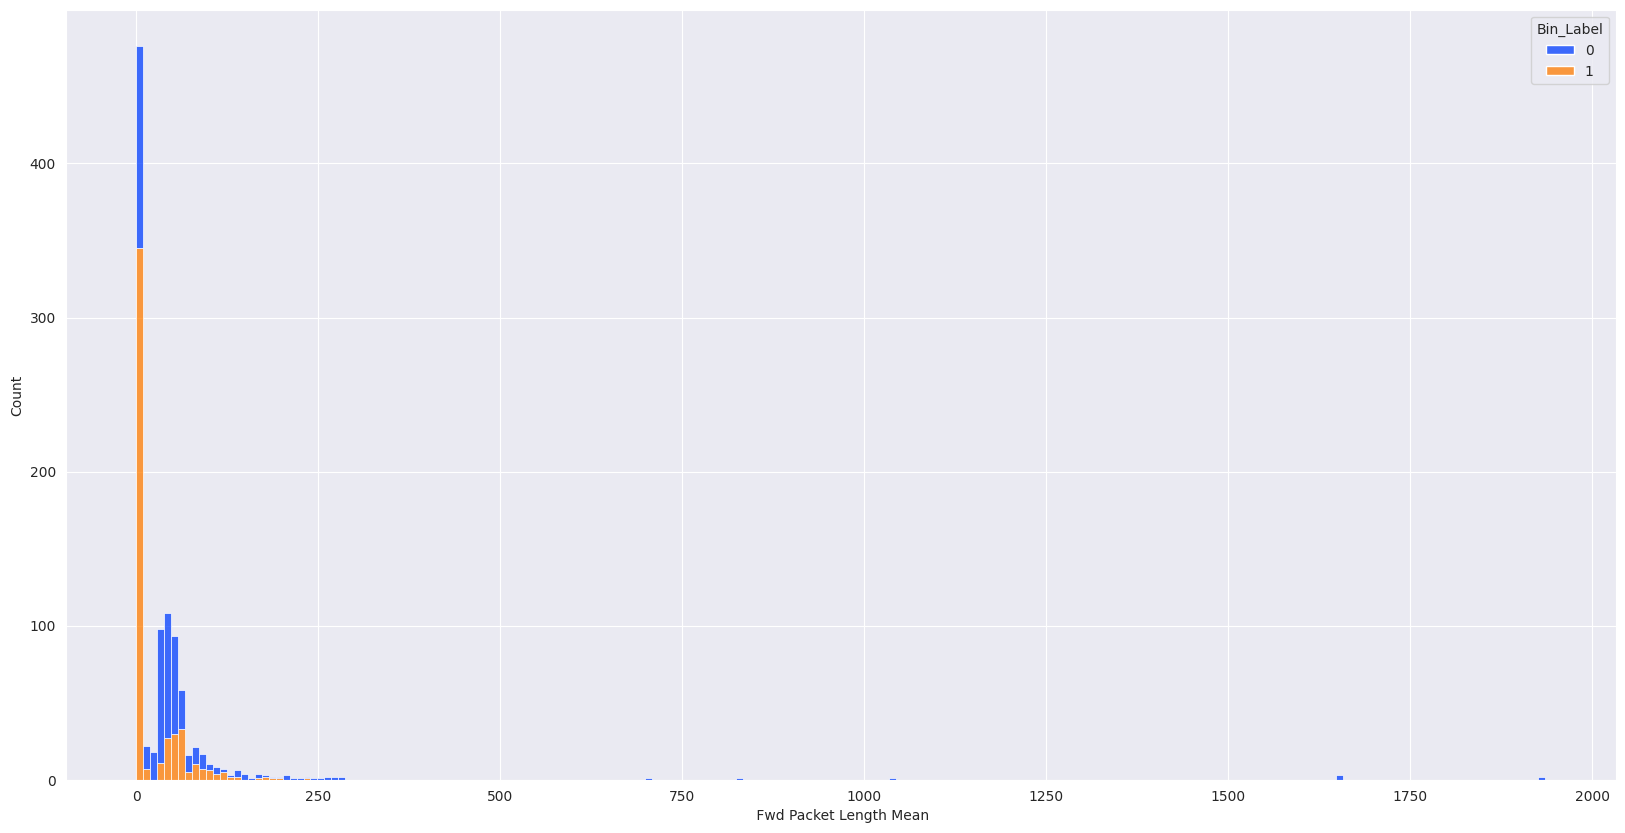

In [54]:
plt.figure(figsize=(20, 10))
sns.histplot(data=frame_sample, x =' Fwd Packet Length Mean', hue='Bin_Label', 
             multiple='stack')
plt.show()

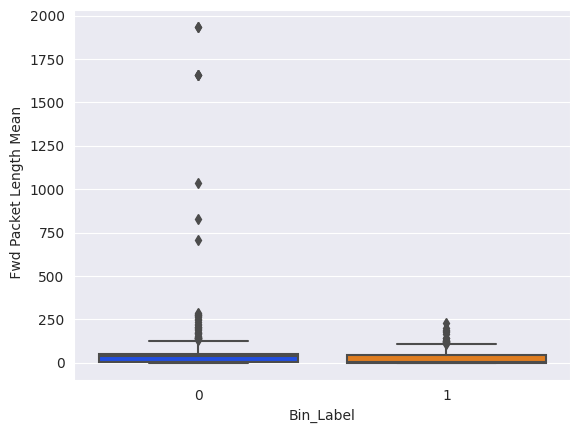

In [55]:
sns.boxplot(data=frame_sample, y=' Fwd Packet Length Mean', x='Bin_Label')
plt.show()

# Data Preparation

In [91]:
frame.drop_duplicates(inplace=True)

In [182]:
sample_120000 = frame.groupby('Bin_Label').sample(n=60000, random_state=1)

In [185]:
y = sample_120000['Bin_Label']
X = sample_120000.drop('Bin_Label', axis=1)

In [112]:
import torch
import torch.nn as nn
import sklearn
from sklearn.preprocessing import StandardScaler

from tqdm import tqdm

In [187]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

In [188]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (96000, 63)
X_test shape: (24000, 63)
y_train shape: (96000,)
y_test shape: (24000,)


In [189]:
scaler_ = StandardScaler()
scaler_.fit(X_train)

StandardScaler()

In [190]:
X_train = scaler_.transform(X_train)
X_test = scaler_.transform(X_test)

# PyTorch MLP

In [195]:
class MLP(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.fc3 = nn.Linear(hidden_size, output_size)
        self.relu = nn.ReLU()

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        out = self.relu(out)
        out = self.fc3(out)
        return out

In [196]:
class TorchMLPClassifier(sklearn.base.BaseEstimator, sklearn.base.ClassifierMixin):
    def __init__(
        self,
        input_size,
        hidden_size,
        output_size,
        learning_rate=0.01,
        num_epochs=10,
        batch_size=64,
        device = 'cpu'
    ):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.learning_rate = learning_rate
        self.num_epochs = num_epochs
        self.batch_size = batch_size
        self.device = torch.device(device) 
        self.model = MLP(input_size, hidden_size, output_size).to(self.device)
        
            
    def _validate_input(self, X, y):
        y = y.astype(np.int32)
        X, y = self._validate_data(
            X,
            y,
            accept_sparse=["csr", "csc"],
            multi_output=True,
            dtype=(np.float64, np.float32, np.int32),
            reset=True,
        )
        self.classes_ = sklearn.utils.multiclass.unique_labels(y)
        return X, y

    def fit(self, X, y):

        X, y = self._validate_input(X, y)

        # Convert data to PyTorch tensors
        X_tensor = torch.tensor(X, dtype=torch.float32)
        y_tensor = torch.tensor(y, dtype=torch.long)

        # Define loss function and optimizer
        criterion = nn.CrossEntropyLoss()
        optimizer = torch.optim.Adam(self.model.parameters(), lr=self.learning_rate)

        # Train the model
        n = 0
        for epoch in tqdm(range(self.num_epochs)):
            fit_loss = []
            n += 1
            for k, i in enumerate(range(0, len(X), self.batch_size)):
                # Forward pass
                outputs = self.model(X_tensor[i : i + self.batch_size].to(self.device))
                
                # Compute loss
                loss = criterion(outputs, y_tensor[i : i + self.batch_size].to(self.device))
                
                fit_loss.append(loss.detach().cpu().numpy())
                if k % 100 == 0 and k!=0:
                    print(f"Batch {k} loss: {np.mean(fit_loss[:k]):.3f}")
                # Backward and optimize
                optimizer.zero_grad()
                loss.backward()
                optimizer.step()
            print(f"Epoch {n} loss: {np.mean(fit_loss):.3f}")
    
    def predict(self, X):
        # Convert data to PyTorch tensor
        X_tensor = torch.tensor(X, dtype=torch.float32)

        # Forward pass and get predictions
        with torch.no_grad():
            outputs = self.model(X_tensor)
        
        _, predicted = torch.max(outputs.data, 1)

        # Convert predictions to numpy array and return
        return predicted.numpy()

    def predict_proba(self, X):
        # Convert data to PyTorch tensor
        X_tensor = torch.tensor(X, dtype=torch.float32)

        # Forward pass and get softmax probabilities
        with torch.no_grad():
            outputs = self.model(X_tensor)
        
        softmax = nn.Softmax(dim=1)
        probabilities = softmax(outputs).detach().numpy()

        # Return probabilities
        return probabilities

In [197]:
estimator=TorchMLPClassifier(
        input_size=X_train.shape[1], hidden_size=128, output_size=y_train.shape[0])
estimator.fit(X_train, y_train)

  0%|          | 0/10 [00:00<?, ?it/s]

Batch 100 loss: 0.671
Batch 200 loss: 0.408
Batch 300 loss: 0.312
Batch 400 loss: 0.263
Batch 500 loss: 0.232
Batch 600 loss: 0.215
Batch 700 loss: 0.203
Batch 800 loss: 0.191
Batch 900 loss: 0.182
Batch 1000 loss: 0.175
Batch 1100 loss: 0.171
Batch 1200 loss: 0.164
Batch 1300 loss: 0.166
Batch 1400 loss: 0.163


 10%|█         | 1/10 [12:53<1:56:00, 773.44s/it]

Epoch 1 loss: 0.159
Batch 100 loss: 0.120
Batch 200 loss: 0.113
Batch 300 loss: 0.104
Batch 400 loss: 0.103
Batch 500 loss: 0.099
Batch 600 loss: 0.097
Batch 700 loss: 0.096
Batch 800 loss: 0.093
Batch 900 loss: 0.094
Batch 1000 loss: 0.094
Batch 1100 loss: 0.094
Batch 1200 loss: 0.093
Batch 1300 loss: 0.092
Batch 1400 loss: 0.092


 20%|██        | 2/10 [28:55<1:57:54, 884.37s/it]

Epoch 2 loss: 0.092
Batch 100 loss: 0.103
Batch 200 loss: 0.094
Batch 300 loss: 0.090
Batch 400 loss: 0.088
Batch 500 loss: 0.083
Batch 600 loss: 0.083
Batch 700 loss: 0.087
Batch 800 loss: 0.090
Batch 900 loss: 0.091
Batch 1000 loss: 0.090
Batch 1100 loss: 0.092
Batch 1200 loss: 0.091
Batch 1300 loss: 0.091
Batch 1400 loss: 0.091


 30%|███       | 3/10 [45:27<1:48:55, 933.64s/it]

Epoch 3 loss: 0.091
Batch 100 loss: 0.095
Batch 200 loss: 0.096
Batch 300 loss: 0.089
Batch 400 loss: 0.087
Batch 500 loss: 0.082
Batch 600 loss: 0.081
Batch 700 loss: 0.079
Batch 800 loss: 0.076
Batch 900 loss: 0.077
Batch 1000 loss: 0.077
Batch 1100 loss: 0.077
Batch 1200 loss: 0.077
Batch 1300 loss: 0.076
Batch 1400 loss: 0.076


 40%|████      | 4/10 [57:15<1:24:27, 844.63s/it]

Epoch 4 loss: 0.077
Batch 100 loss: 0.161
Batch 200 loss: 0.124
Batch 300 loss: 0.125
Batch 400 loss: 0.116
Batch 500 loss: 0.106
Batch 600 loss: 0.101
Batch 700 loss: 0.096
Batch 800 loss: 0.091
Batch 900 loss: 0.088
Batch 1000 loss: 0.087
Batch 1100 loss: 0.085
Batch 1200 loss: 0.084
Batch 1300 loss: 0.083
Batch 1400 loss: 0.081


 50%|█████     | 5/10 [1:10:58<1:09:43, 836.79s/it]

Epoch 5 loss: 0.081
Batch 100 loss: 0.062
Batch 200 loss: 0.060
Batch 300 loss: 0.060
Batch 400 loss: 0.061
Batch 500 loss: 0.061
Batch 600 loss: 0.062
Batch 700 loss: 0.062
Batch 800 loss: 0.062
Batch 900 loss: 0.061
Batch 1000 loss: 0.062
Batch 1100 loss: 0.062
Batch 1200 loss: 0.062
Batch 1300 loss: 0.062
Batch 1400 loss: 0.062


 60%|██████    | 6/10 [1:22:22<52:18, 784.57s/it]  

Epoch 6 loss: 0.062
Batch 100 loss: 0.055
Batch 200 loss: 0.058
Batch 300 loss: 0.061
Batch 400 loss: 0.072
Batch 500 loss: 0.068
Batch 600 loss: 0.067
Batch 700 loss: 0.066
Batch 800 loss: 0.065
Batch 900 loss: 0.064
Batch 1000 loss: 0.065
Batch 1100 loss: 0.067
Batch 1200 loss: 0.068
Batch 1300 loss: 0.067
Batch 1400 loss: 0.069


 70%|███████   | 7/10 [1:32:10<36:01, 720.36s/it]

Epoch 7 loss: 0.076
Batch 100 loss: 0.134


 70%|███████   | 7/10 [1:33:23<40:01, 800.54s/it]


KeyboardInterrupt: 

In [198]:
!pwd

/kaggle/working


In [200]:
torch.save(estimator.model.state_dict(), 'pytorch_02.pt')

In [201]:
preds_test = estimator.predict(X_test)

In [209]:
from sklearn.metrics import f1_score
print(f"F1 Score: {f1_score(list(y_test), preds_test):.2f}")

F1 Score: 0.98


In [206]:
from sklearn.metrics import confusion_matrix
confusion_matrix(list(y_test), preds_test)

array([[11512,   488],
       [   57, 11943]])